# Word Cloud

In [1]:
doc1 = "Sugar is bad to consume. My sister like to have sugar, but not my dad"
doc2 = "My father spends a lot of time driving and my sister around dance practice"
doc3 = "Doctors suggest that driving may cause increase in blood pressure"

docs = [doc1, doc2, doc3]

## to install wordcloud 


```!pip install WordCloud```

In [2]:
# !pip install WordCloud

In [3]:
from wordcloud import WordCloud

In [4]:
long_string = ",".join(docs)
wordcloud = WordCloud(background_color="white")
wordcloud.generate(long_string)

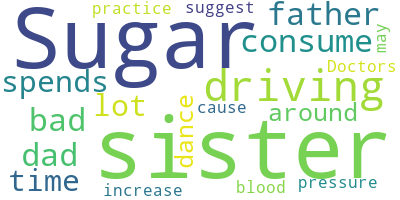

In [5]:
wordcloud.to_image()

In [6]:
import pandas as pd

In [7]:
people = pd.read_csv('people_data.csv', nrows=5000)
people.fillna("No Data", inplace=True)

In [8]:
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Bill_Clinton>,Bill Clinton,william jefferson bill clinton born william je...
1,<http://dbpedia.org/resource/Polyana_L%C3%B3pez>,Polyana L%C3%B3pez,polyana lpez born circa 1985 is an argentine a...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [9]:
long_string = ','.join(list(people['text'].values))

In [10]:
wordcloud.generate(long_string)

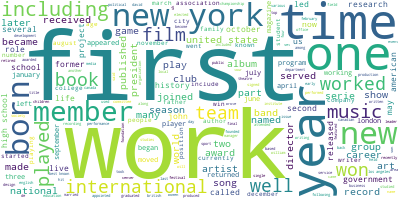

In [11]:
wordcloud.to_image()

# Topic Modelling

- Summarization ( its not )

- Bunch of document - will be able to generate title for it.

- Tries to give you a score of all words in the corpus

- LDA ( Multiple algos for topic modelling, LDA - most popular )

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
computer = """Computer science is the study of processes that interact with data and that can be represented as data in the form of programs. It enables the use of algorithms to manipulate, store, and communicate digital information. A computer scientist studies the theory of computation and the design of software systems. Its fields can be divided into theoretical and practical disciplines. Computational complexity theory is highly abstract, while computer graphics emphasizes real-world applications. Programming language theory considers approaches to the description of computational processes, while software engineering involves the use of programming languages and complex systems. Human–computer interaction considers the challenges in making computers useful, usable, and accessible."""
food="""Jalebi, also known as zulbia, jilapi and zalabia, is an Indian sweet popular all over South Asia and the Middle East. It is made by deep-frying maida flour (plain flour or all-purpose flour) batter in pretzel or circular shapes, which are then soaked in sugar syrup. They are particularly popular in the Indian subcontinent and Iran. This dessert can be served warm or cold. They have a somewhat chewy texture with a crystallized sugary exterior coating. Citric acid or lime juice is sometimes added to the syrup, as well as rose water. Jalebi is eaten with curd or rabri (North India) along with optional other flavours such as kewra (scented water).This dish is not to be confused with similar sweets and variants like imarti and chhena jalebi."""

In [14]:
doc_complete = [computer, food] # corpus

In [15]:
number_topics = 2

# tfidf
tf = TfidfVectorizer(stop_words="english",ngram_range=(1,3))
tf_data = tf.fit_transform(doc_complete)


# LDA - todo
lda = LatentDirichletAllocation(n_components=number_topics)
lda.fit(tf_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [16]:
tf_data

<2x390 sparse matrix of type '<class 'numpy.float64'>'
	with 390 stored elements in Compressed Sparse Row format>

In [17]:
lda.components_.shape

(2, 390)

In [18]:
tf_data.shape

(2, 390)

In [19]:
tf.get_feature_names()

['abstract',
 'abstract computer',
 'abstract computer graphics',
 'accessible',
 'acid',
 'acid lime',
 'acid lime juice',
 'added',
 'added syrup',
 'added syrup rose',
 'algorithms',
 'algorithms manipulate',
 'algorithms manipulate store',
 'applications',
 'applications programming',
 'applications programming language',
 'approaches',
 'approaches description',
 'approaches description computational',
 'asia',
 'asia middle',
 'asia middle east',
 'batter',
 'batter pretzel',
 'batter pretzel circular',
 'challenges',
 'challenges making',
 'challenges making computers',
 'chewy',
 'chewy texture',
 'chewy texture crystallized',
 'chhena',
 'chhena jalebi',
 'circular',
 'circular shapes',
 'circular shapes soaked',
 'citric',
 'citric acid',
 'citric acid lime',
 'coating',
 'coating citric',
 'coating citric acid',
 'cold',
 'cold somewhat',
 'cold somewhat chewy',
 'communicate',
 'communicate digital',
 'communicate digital information',
 'complex',
 'complex systems',
 'comp

In [20]:
lda.components_[0].argsort()

array([194, 203, 204, 205, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       227, 228, 202, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 243, 244, 245, 230, 201, 200, 199, 142, 143, 144, 145,
       146, 147, 151, 152, 153, 163, 164, 165, 166, 167, 168, 170, 171,
       198, 197, 196, 195, 388, 193, 246, 192, 190, 188, 187, 186, 173,
       172, 191, 250, 251, 252, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 338, 339, 340, 341, 347, 348, 349, 387, 386, 385, 384,
       380, 379, 326, 378, 375, 374, 373, 372, 371, 370, 377, 140, 325,
       323, 266, 267, 268, 269, 270, 271, 278, 279, 280, 281, 282, 283,
       290, 291, 292, 293, 294, 322, 312, 311, 310, 309, 308, 324, 307,
       300, 299, 298, 297, 296, 295, 301, 139, 389,  23,  19, 102, 103,
       104,  76,  75,  74,  20,  37, 112, 113,  38,  39,  40,  41,  87,
       111,  43,  21,  24,  85,  84,  83,  82,  36,  35,  34,  22,  33,
        31,  30,  93,  94,  95,  29,  28,  32,  44,  42,  86, 13

In [21]:
lda.components_[0].argsort()[-5:][::-1]

array([ 62, 353, 302, 258, 342])

In [22]:
all_features = tf.get_feature_names()

for each in lda.components_: # for each topic
    index = each.argsort()[-5:][::-1]
    topic = ""
    for i in index:
        topic = topic + " " +all_features[i]
    
    print(topic)

 computer theory software programming systems
 jalebi flour syrup popular water


# Example of argsort

In [23]:
import numpy as np

In [24]:
x = np.array([11,55,58,12])

In [25]:
x.argsort()

array([0, 3, 1, 2])

# POS and NER

### POS - Parts of speech

In [26]:
import nltk
from nltk.tokenize import word_tokenize

In [27]:
# if pos code fails 
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nishant/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/nishant/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [28]:
sentence = "I am good at playing football"
text = word_tokenize(sentence)

In [29]:
nltk.pos_tag(text, tagset='universal')

[('I', 'PRON'),
 ('am', 'VERB'),
 ('good', 'ADJ'),
 ('at', 'ADP'),
 ('playing', 'VERB'),
 ('football', 'NOUN')]

In [30]:
nltk.pos_tag(text)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('good', 'JJ'),
 ('at', 'IN'),
 ('playing', 'VBG'),
 ('football', 'NN')]

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
ws = WordNetLemmatizer()

In [33]:
words = ['go','going','gone','went','city','cities','organization']

In [34]:
for each in words:
    print(ws.lemmatize(each))

go
going
gone
went
city
city
organization


In [35]:
for each in words:
    print(ws.lemmatize(each, pos='v'))

go
go
go
go
city
cities
organization


In [36]:
words

['go', 'going', 'gone', 'went', 'city', 'cities', 'organization']

In [37]:
words = nltk.pos_tag(words)
words

[('go', 'VB'),
 ('going', 'VBG'),
 ('gone', 'VBN'),
 ('went', 'VBD'),
 ('city', 'NN'),
 ('cities', 'NNS'),
 ('organization', 'NN')]

In [38]:
for word, pos in words:
    print(ws.lemmatize(word, pos=pos[0].lower()))

go
go
go
go
city
city
organization


# NER

In [39]:
sent = 'Microsoft Corporation is an American multinational technology company with headquarters in Redmond, Washington.'

In [40]:
tokenized = nltk.pos_tag(word_tokenize(sent))
tokenized

[('Microsoft', 'NNP'),
 ('Corporation', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('multinational', 'NN'),
 ('technology', 'NN'),
 ('company', 'NN'),
 ('with', 'IN'),
 ('headquarters', 'NNS'),
 ('in', 'IN'),
 ('Redmond', 'NNP'),
 (',', ','),
 ('Washington', 'NNP'),
 ('.', '.')]

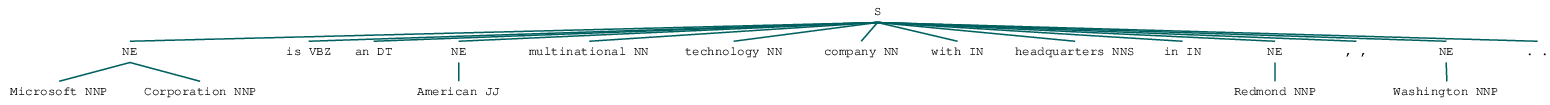

In [41]:
nltk.ne_chunk(tokenized, binary=True) # combine - 2 or more words

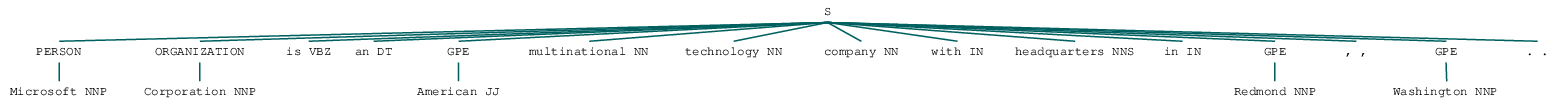

In [42]:
nltk.ne_chunk(tokenized) # not combine - all your NE are single word

In [43]:
tree = nltk.ne_chunk(tokenized, binary=True)

mwe_list = []
for each in tree:
    each = str(each)
    if "NE" in each:
        
        string = ""
        for all in each.split(" ")[1:]:
            string += all.split('/')[0] + " "
            
        mwe_list.append(string)

In [44]:
custom =["Apple Inc"]

In [45]:
mwe_list + custom

['Microsoft Corporation ', 'American ', 'Redmond ', 'Washington ', 'Apple Inc']